# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

sns.set(style="whitegrid")

# Load dataset & quick peek

In [2]:
df = pd.read_csv("data/heart.csv")   # ganti path jika perlu
print("Shape:", df.shape)
display(df.head())
print("\nInfo:")
df.info()
print("\nDescriptive statistics:")
display(df.describe())

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

Descriptive statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\Nazriel_1806\AppData\Local\Temp\ipykernel_14868\3636158420.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=df, palette=['#1abc9c','#f39c12'])


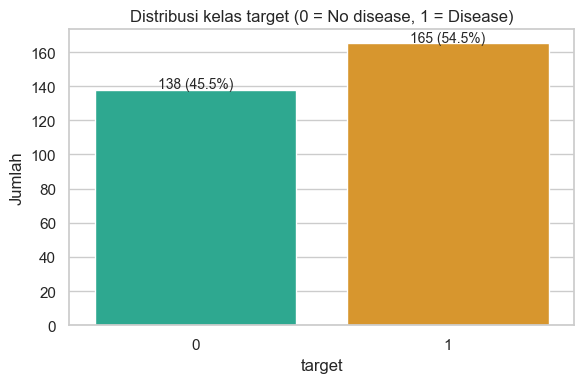


Value counts:
target
1    165
0    138
Name: count, dtype: int64


In [3]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='target', data=df, palette=['#1abc9c','#f39c12'])
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    ax.text(p.get_x() + p.get_width()/2, p.get_height()+1,
            f"{count} ({100*count/total:.1f}%)", ha='center', fontsize=10)
plt.title("Distribusi kelas target (0 = No disease, 1 = Disease)")
plt.xlabel("target")
plt.ylabel("Jumlah")
plt.tight_layout()
plt.show()

print("\nValue counts:")
print(df['target'].value_counts())

# EDA: korelasi & boxplots ringkas

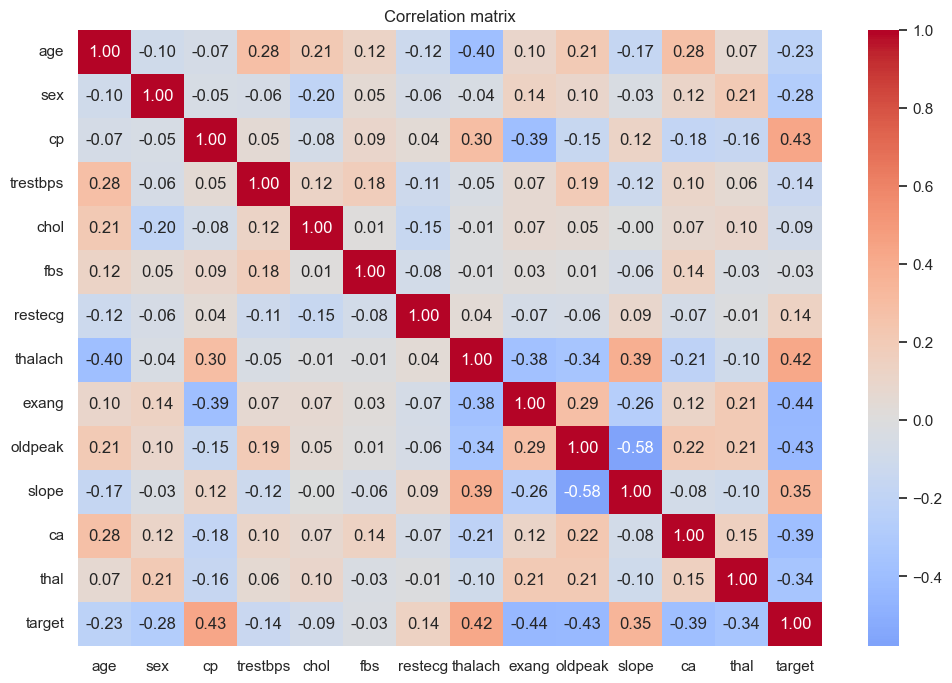

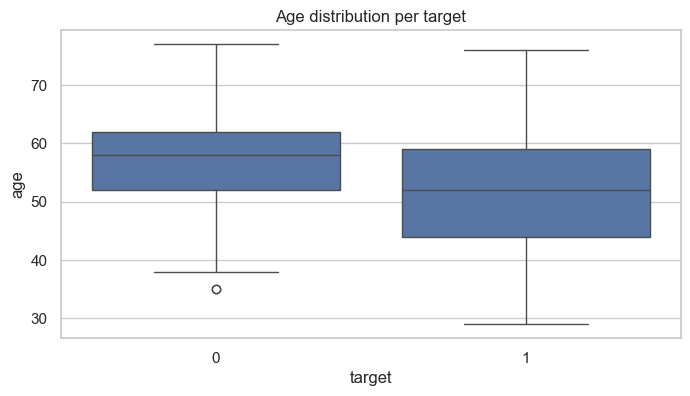

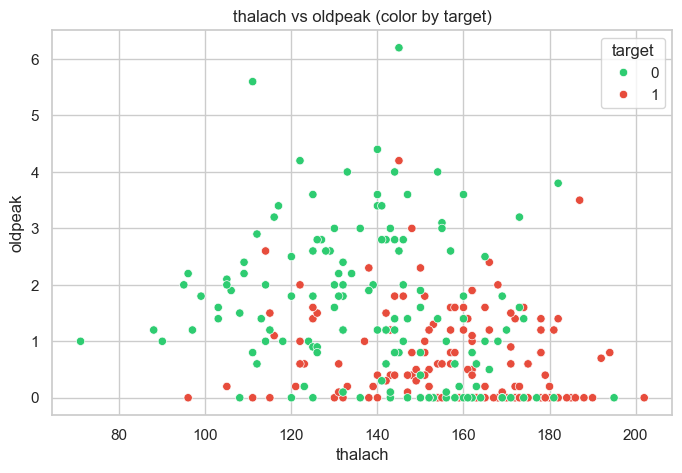

In [4]:
# Korelasi numerik
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation matrix")
plt.show()

# Boxplot contoh: age vs target
plt.figure(figsize=(8,4))
sns.boxplot(x='target', y='age', data=df)
plt.title("Age distribution per target")
plt.show()

# Scatter example: thalach vs oldpeak colored by target
plt.figure(figsize=(8,5))
sns.scatterplot(x='thalach', y='oldpeak', hue='target', data=df, palette=['#2ecc71','#e74c3c'])
plt.title("thalach vs oldpeak (color by target)")
plt.show()


# Preprocessing (handle missing, feature types)

In [5]:
# cek missing
print("Missing values per column:\n", df.isnull().sum())

# Dataset UCI classic biasanya bersih; jika ada NaN, kita imputasi median
df = df.copy()
df.fillna(df.median(), inplace=True)

# Pastikan semua kolom bertipe numeric 
print("\nDtypes:")
print(df.dtypes)

# Siapkan X, y
X = df.drop('target', axis=1)
y = df['target']


Missing values per column:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Dtypes:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


# Split data (train/test) dan stratify

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Train class distribution:\n", y_train.value_counts(normalize=True))


Train shape: (212, 13) Test shape: (91, 13)
Train class distribution:
 target
1    0.542453
0    0.457547
Name: proportion, dtype: float64


# Model A: Decision Tree (no pruning, show overfitting)

In [7]:
modelA = DecisionTreeClassifier(random_state=42)  
modelA.fit(X_train, y_train)

y_train_pred_A = modelA.predict(X_train)
y_test_pred_A = modelA.predict(X_test)

print("Model A (no pruning) - Train accuracy:", accuracy_score(y_train, y_train_pred_A))
print("Model A (no pruning) - Test  accuracy:", accuracy_score(y_test, y_test_pred_A))

print("\nClassification report (Test):")
print(classification_report(y_test, y_test_pred_A))


Model A (no pruning) - Train accuracy: 1.0
Model A (no pruning) - Test  accuracy: 0.7252747252747253

Classification report (Test):
              precision    recall  f1-score   support

           0       0.68      0.73      0.71        41
           1       0.77      0.72      0.74        50

    accuracy                           0.73        91
   macro avg       0.72      0.73      0.72        91
weighted avg       0.73      0.73      0.73        91



# Confusion matrix & ROC for Model A

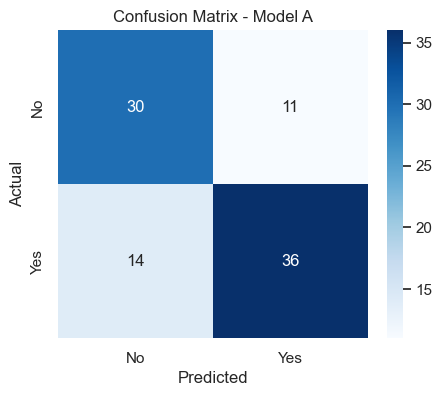

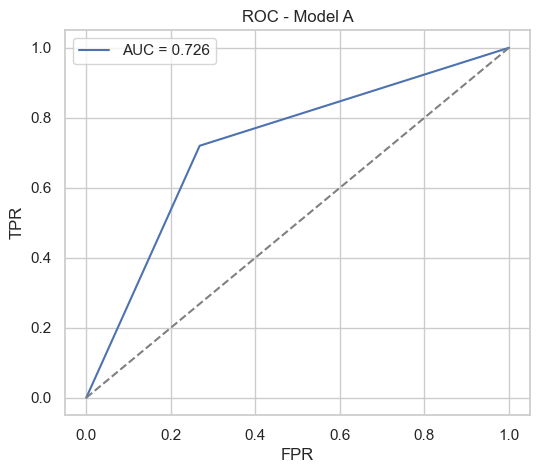

In [8]:
cmA = confusion_matrix(y_test, y_test_pred_A)
plt.figure(figsize=(5,4))
sns.heatmap(cmA, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix - Model A')
plt.show()

# ROC AUC
if hasattr(modelA, "predict_proba"):
    y_proba_A = modelA.predict_proba(X_test)[:,1]
    fpr,tpr,_ = roc_curve(y_test, y_proba_A)
    aucA = roc_auc_score(y_test, y_proba_A)
    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"AUC = {aucA:.3f}")
    plt.plot([0,1],[0,1],'--', color='grey')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - Model A"); plt.legend(); plt.grid(True)
    plt.show()


# CELL 9 — Model B: Decision Tree (pruned) — manual params

In [9]:
# CELL 9
modelB = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, random_state=42, criterion='entropy')
modelB.fit(X_train, y_train)

y_train_pred_B = modelB.predict(X_train)
y_test_pred_B = modelB.predict(X_test)

print("Model B (pruned) - Train accuracy:", accuracy_score(y_train, y_train_pred_B))
print("Model B (pruned) - Test  accuracy:", accuracy_score(y_test, y_test_pred_B))

print("\nClassification report (Test) - Model B:")
print(classification_report(y_test, y_test_pred_B))


Model B (pruned) - Train accuracy: 0.8584905660377359
Model B (pruned) - Test  accuracy: 0.7582417582417582

Classification report (Test) - Model B:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72        41
           1       0.77      0.80      0.78        50

    accuracy                           0.76        91
   macro avg       0.76      0.75      0.75        91
weighted avg       0.76      0.76      0.76        91



# Confusion matrix & ROC for Model B

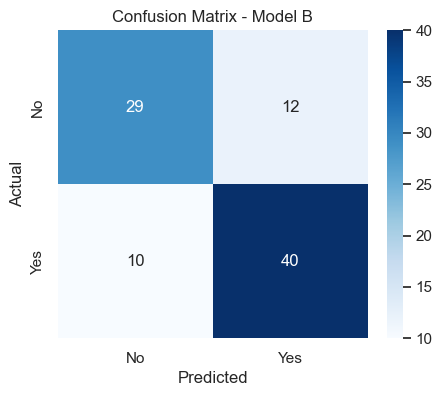

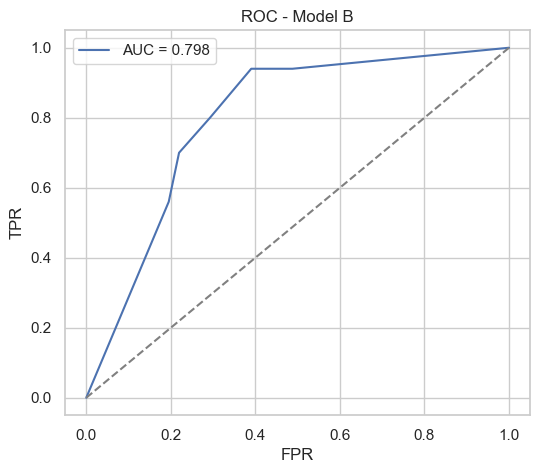

In [10]:
cmB = confusion_matrix(y_test, y_test_pred_B)
plt.figure(figsize=(5,4))
sns.heatmap(cmB, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix - Model B')
plt.show()

if hasattr(modelB, "predict_proba"):
    y_proba_B = modelB.predict_proba(X_test)[:,1]
    fpr,tpr,_ = roc_curve(y_test, y_proba_B)
    aucB = roc_auc_score(y_test, y_proba_B)
    plt.figure(figsize=(6,5))
    plt.plot(fpr,tpr,label=f"AUC = {aucB:.3f}")
    plt.plot([0,1],[0,1],'--', color='grey')
    plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC - Model B"); plt.legend(); plt.grid(True)
    plt.show()


# Visualisasi pohon keputusan (Model B)

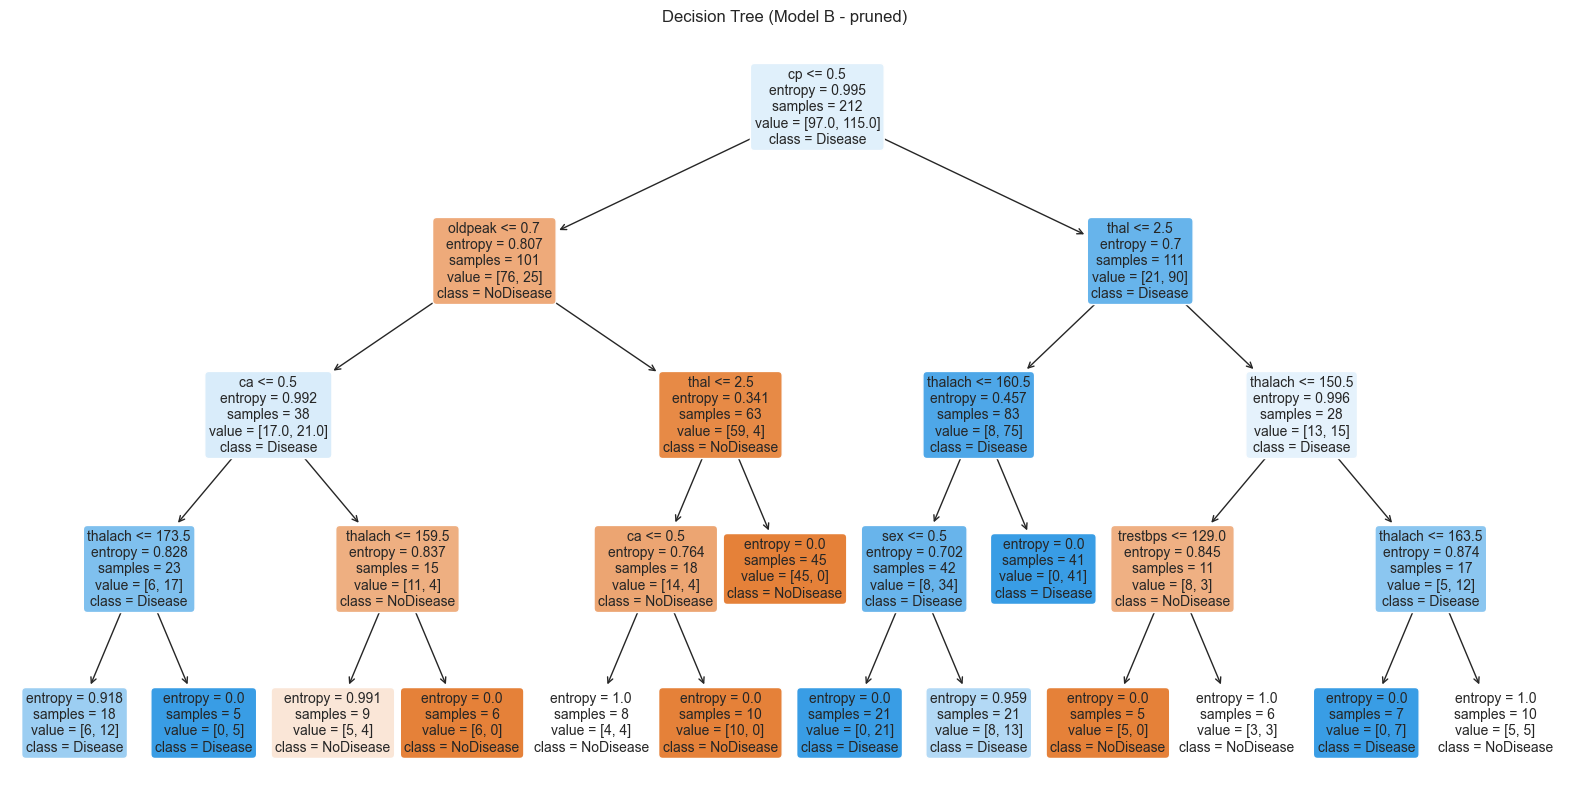

In [11]:
plt.figure(figsize=(20,10))
plot_tree(modelB, feature_names=X.columns, class_names=['NoDisease','Disease'], filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree (Model B - pruned)")
plt.show()


# Ekstrak rules (akar → daun) untuk interpretasi

In [12]:
r = export_text(modelB, feature_names=list(X.columns))
print("Decision rules (Model B):\n")
print(r)

with open("decision_rules_modelB.txt","w") as f:
    f.write(r)
print("\nRules saved to decision_rules_modelB.txt")


Decision rules (Model B):

|--- cp <= 0.50
|   |--- oldpeak <= 0.70
|   |   |--- ca <= 0.50
|   |   |   |--- thalach <= 173.50
|   |   |   |   |--- class: 1
|   |   |   |--- thalach >  173.50
|   |   |   |   |--- class: 1
|   |   |--- ca >  0.50
|   |   |   |--- thalach <= 159.50
|   |   |   |   |--- class: 0
|   |   |   |--- thalach >  159.50
|   |   |   |   |--- class: 0
|   |--- oldpeak >  0.70
|   |   |--- thal <= 2.50
|   |   |   |--- ca <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- ca >  0.50
|   |   |   |   |--- class: 0
|   |   |--- thal >  2.50
|   |   |   |--- class: 0
|--- cp >  0.50
|   |--- thal <= 2.50
|   |   |--- thalach <= 160.50
|   |   |   |--- sex <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- sex >  0.50
|   |   |   |   |--- class: 1
|   |   |--- thalach >  160.50
|   |   |   |--- class: 1
|   |--- thal >  2.50
|   |   |--- thalach <= 150.50
|   |   |   |--- trestbps <= 129.00
|   |   |   |   |--- class: 0
|   |   |   |--- trestbps >  129.00
|   | 

# Feature importance (Model B)

cp          0.365717
thalach     0.164224
oldpeak     0.158173
thal        0.138330
ca          0.083902
sex         0.066311
trestbps    0.023344
age         0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
exang       0.000000
slope       0.000000
dtype: float64

C:\Users\Nazriel_1806\AppData\Local\Temp\ipykernel_14868\689713539.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fi.values, y=fi.index, palette='viridis')


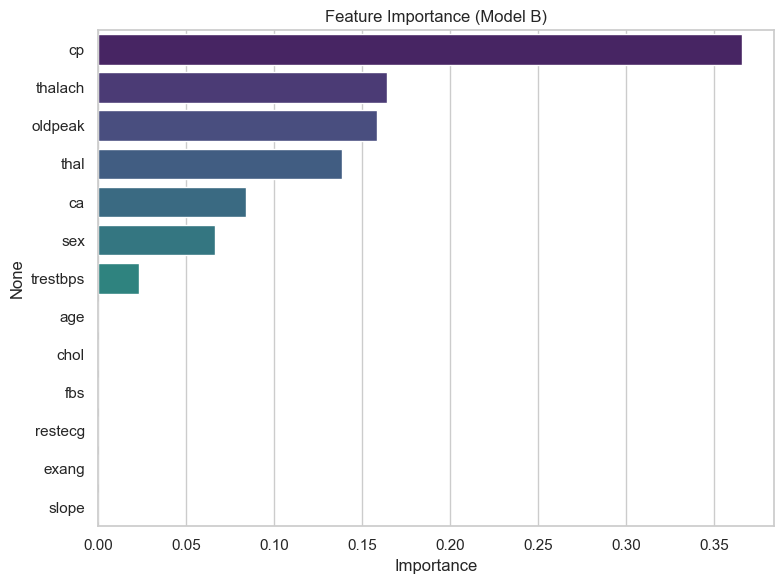

In [13]:
fi = pd.Series(modelB.feature_importances_, index=X.columns).sort_values(ascending=False)
display(fi)
plt.figure(figsize=(8,6))
sns.barplot(x=fi.values, y=fi.index, palette='viridis')
plt.title("Feature Importance (Model B)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


# Perbandingan ringkas A vs B (train/test acc)

In [14]:
results = pd.DataFrame({
    'Model': ['Model A (no prune)','Model B (pruned)'],
    'Train Acc': [accuracy_score(y_train, y_train_pred_A), accuracy_score(y_train, y_train_pred_B)],
    'Test  Acc': [accuracy_score(y_test, y_test_pred_A), accuracy_score(y_test, y_test_pred_B)]
})
display(results)


,Model,Train Acc,Test Acc
0,Model A (no prune),1.000000,0.725275
1,Model B (pruned),0.858491,0.758242


# GridSearchCV untuk mencari hyperparameter terbaik (Model B tuned)

In [15]:
param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': [3,4,5,6,7],
    'min_samples_leaf': [1,2,4,6,8],
    'min_samples_split': [2,4,6,8]
}
dt = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
print("Best params:", grid.best_params_)
best_dt = grid.best_estimator_

# Evaluasi best_dt
y_test_best = best_dt.predict(X_test)
print("Best DT test accuracy:", accuracy_score(y_test, y_test_best))
print(classification_report(y_test, y_test_best))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best DT test accuracy: 0.7362637362637363
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        41
           1       0.77      0.74      0.76        50

    accuracy                           0.74        91
   macro avg       0.73      0.74      0.73        91
weighted avg       0.74      0.74      0.74        91



# Simpan model terbaik (simpan Model B atau hasil grid)

In [16]:
joblib.dump(modelB, "decision_tree_modelB.joblib")
print("Saved model to decision_tree_modelB.joblib")

Saved model to decision_tree_modelB.joblib
